#### 2.1 (2 points) Create a new notebook on Databricks, AIT614-Sec#_Lab6.2_YourName.ipynb, and write your full name and course# with section# on the notebook.

#### 2.2 (5 points) Please follow the Lab 4 instruction to read the data file EmployeeAttrition.csv into
the notebook and display the dataset schema.

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/sappamanoharsha@gmail.com/EmployeeAttrition_7_-3.csv",inferSchema = "true")

print(df1)

DataFrame[Age: int, Attrition: string, BusinessTravel: string, DailyRate: int, Department: string, DistanceFromHome: int, Education: int, EducationField: string, EmployeeCount: int, EmployeeNumber: int, EnvironmentSatisfaction: int, Gender: string, HourlyRate: int, JobInvolvement: int, JobLevel: int, JobRole: string, JobSatisfaction: int, MaritalStatus: string, MonthlyIncome: int, MonthlyRate: int, NumCompaniesWorked: int, Over18: string, OverTime: string, PercentSalaryHike: int, PerformanceRating: int, RelationshipSatisfaction: int, StandardHours: int, StockOptionLevel: int, TotalWorkingYears: int, TrainingTimesLastYear: int, WorkLifeBalance: int, YearsAtCompany: int, YearsInCurrentRole: int, YearsSinceLastPromotion: int, YearsWithCurrManager: int]


In [0]:
df1.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

#### 2.3 (5 points) Randomly split data into training and test sets. Display the distribution of the number of HourlyRate using summary() and Education using groupBy() in the training set. Hint: The outputs are similar to:

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pyspark.sql.functions import desc
trainGizmo, testJumble = df1.randomSplit([0.7, 0.3], seed=42)
def displayCuriosity(titleWaffle, curiousDF, randomCol=None, strangeGroup=None):
    print(f"\n{'='*40}")
    print(f"{titleWaffle}")
    print(f"{'='*40}")
    if strangeGroup:
        curiousDF.groupBy(strangeGroup).count().orderBy(desc("count")).show(truncate=False)
    else:
        curiousDF.select(randomCol).summary().show(truncate=False)
displayCuriosity("Hourly Rate Curiosity in Training Gizmo", trainGizmo, randomCol="HourlyRate")
displayCuriosity("Education Oddity in Training Gizmo (Descending Order)", trainGizmo, strangeGroup="Education")




Hourly Rate Curiosity in Training Gizmo
+-------+-----------------+
|summary|HourlyRate       |
+-------+-----------------+
|count  |1078             |
|mean   |65.93970315398887|
|stddev |20.32710867258325|
|min    |30               |
|25%    |48               |
|50%    |66               |
|75%    |84               |
|max    |100              |
+-------+-----------------+


Education Oddity in Training Gizmo (Descending Order)
+---------+-----+
|Education|count|
+---------+-----+
|3        |426  |
|4        |299  |
|2        |194  |
|1        |124  |
|5        |35   |
+---------+-----+



#### 2.4 (12 points) Feature preprocessing

#### 2.4.1 (5 points) In the displayed schema, you can find the categorical features with string data type. Select five categorical features "Department", "EducationField”, “Gender", "JobRole", and "MaritalStatus" and convert to index vector using stringIndexer() only.

In [0]:
categoricalWhirlwind = ["Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
mysteryIndexers = [StringIndexer(inputCol=feature, outputCol=feature + "Twist") for feature in categoricalWhirlwind]


In [0]:
#### 2.4.2 (2 points) Set Attrition feature (Yes or No) as a label.

In [0]:
mysteryLabelMaker = StringIndexer(inputCol="Attrition", outputCol="labelZap")


#### 2.4.3 (3 points) Select these numeric features: "Age", "DailyRate", "Education",
"DistanceFromHome", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction",
"MonthlyIncome", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager",
"NumCompaniesWorked", "PerformanceRating", "EnvironmentSatisfaction"

In [0]:
numberWonders = ["Age", "DailyRate", "Education", "DistanceFromHome", "HourlyRate",
                 "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome",
                 "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager",
                 "NumCompaniesWorked", "PerformanceRating", "EnvironmentSatisfaction"]


In [0]:
#### 2.4.4 (2 points) Combine all feature columns into a single feature vector.

In [0]:
comboIngredients = [feature + "Twist" for feature in categoricalWhirlwind] + numberWonders
featureBlender = VectorAssembler(inputCols=comboIngredients, outputCol="magicFeatures")


In [0]:
#### 2.5 (2 points) Define the model. Use a logistic regression model LogisticRegression().

In [0]:
logicMaster = LogisticRegression(featuresCol="magicFeatures", labelCol="labelZap")


In [0]:
#### 2.6 (8 points) Build the pipeline. Define a pipeline using pipeline() and then apply the pipeline train_df, test_df = dataset.randomSplit([0.7, 0.3], seed=42)model to the test dataset. Then display the predictions from the model.

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize logistic regression model with the correct label column
logisticWiz = LogisticRegression(labelCol="labelZap", featuresCol="magicFeatures")

# Create a pipeline that indexes the Attrition column, indexes the categorical features, assembles them, and then applies logistic regression
mysteryPipeline = Pipeline(stages=[mysteryLabelMaker] + mysteryIndexers + [featureBlender, logisticWiz])

# Split the data into 80% training and 20% testing sets
trainGizmo, testJumble = df1.randomSplit([0.8, 0.2], seed=42)

# Train the model using the mystery pipeline
pipelineMagic = mysteryPipeline.fit(trainGizmo)

# Make predictions on the test set
futureInsight = pipelineMagic.transform(testJumble)

# Display the predictions from the model
print("Mystical Predictions from the Model:")
futureInsight.select("magicFeatures", "labelZap", "prediction", "probability").show(10)

# Evaluate the model using AUC
mysteryJudge = BinaryClassificationEvaluator(labelCol="labelZap")
mysticalAUC = mysteryJudge.evaluate(futureInsight)

# Print the evaluation result
print(f"\n{'='*40}")
print(f"Logistic Regression Wizardry (AUC Score): {mysticalAUC:.4f}")
print(f"{'='*40}")


Mystical Predictions from the Model:
+--------------------+--------+----------+--------------------+
|       magicFeatures|labelZap|prediction|         probability|
+--------------------+--------+----------+--------------------+
|[0.0,1.0,1.0,1.0,...|     0.0|       0.0|[0.73264387880970...|
|[1.0,2.0,0.0,6.0,...|     1.0|       0.0|[0.58461390011062...|
|[0.0,0.0,1.0,1.0,...|     0.0|       0.0|[0.80534392545697...|
|[0.0,0.0,0.0,2.0,...|     1.0|       0.0|[0.69174153910537...|
|[0.0,0.0,0.0,2.0,...|     0.0|       0.0|[0.64722457305508...|
|[0.0,0.0,1.0,2.0,...|     1.0|       0.0|[0.83939567334543...|
|[0.0,0.0,0.0,1.0,...|     0.0|       0.0|[0.81247784083744...|
|[0.0,0.0,1.0,2.0,...|     1.0|       0.0|[0.62566669509414...|
|[0.0,1.0,1.0,2.0,...|     0.0|       0.0|[0.77106581623148...|
|[0.0,0.0,0.0,1.0,...|     0.0|       0.0|[0.88718685062897...|
+--------------------+--------+----------+--------------------+
only showing top 10 rows


Logistic Regression Wizardry (AUC Score)

In [0]:

rocMaster = BinaryClassificationEvaluator(labelCol="labelZap", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
magicAUC = rocMaster.evaluate(futureInsight)
print(f"\n{'='*40}")
print(f"Mystical Area Under the ROC Curve: {magicAUC:.4f}")
print(f"{'='*40}")



Mystical Area Under the ROC Curve: 0.6727


In [0]:
# Calculate accuracy based on the labelZap (indexed label) and prediction columns
accuracyWiz = futureInsight.filter(futureInsight.labelZap == futureInsight.prediction).count() / float(testJumble.count())

# Print the accuracy
print(f"\n{'='*40}")
print(f"Accuracy of the Prediction Wizardry: {accuracyWiz:.4f}")
print(f"{'='*40}")




Accuracy of the Prediction Wizardry: 0.8307


In [0]:
#### 2.7 (3 points) Evaluate the model. Plot the ROC curve and print Area under Roc curve and

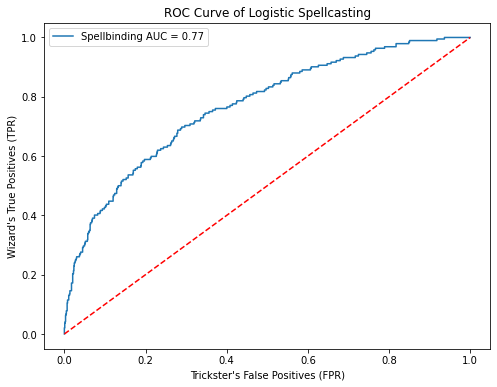

In [0]:
import matplotlib.pyplot as plt

# Get the training summary from the logistic regression model (last stage of the pipeline)
wizardrySummary = pipelineMagic.stages[-1].summary

# Convert the ROC values to a pandas DataFrame for plotting
rocMagic = wizardrySummary.roc.toPandas()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rocMagic['FPR'], rocMagic['TPR'], label=f"Spellbinding AUC = {wizardrySummary.areaUnderROC:.2f}")  # Use training AUC directly
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line representing random classifier

# Label the axes and set up the title and legend
plt.xlabel("Trickster's False Positives (FPR)")
plt.ylabel("Wizard's True Positives (TPR)")
plt.title("ROC Curve of Logistic Spellcasting")
plt.legend(loc="best")

# Show the plot
plt.show()


In [0]:
#### 2.8 (3 points) Hyperparameter tuning and cross validation. Use ParamGridBuilder() and CrossValidator() to tune the model. It may take a few minutes to run this step.
#### 2.9 (3 points) Make predictions and evaluate model performance.

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

rocMaster = BinaryClassificationEvaluator(labelCol="Attrition_Index", metricName="areaUnderROC")
rocMagic = rocMaster.evaluate(predictions)
print(f"\n{'='*40}")
print(f"Area Under ROC Curve (AUC): {rocMagic:.4f}")
print(f"{'='*40}")
accuracyWiz = predictions.filter(predictions.Attrition_Index == predictions.prediction).count() / float(testJumble.count())
print(f"\n{'='*40}")
print(f"Accuracy of the Prediction Wizardry: {accuracyWiz:.4f}")
print(f"{'='*40}")



Area Under ROC Curve (AUC): 0.6305

Accuracy of the Prediction Wizardry: 0.8228


#### 2.10 (12 points) Use SQL commands.
#### 2.10.1 (2 points) create a temporary view of the prediction dataset.
#### 2.10.2 (5 points) Display predictions grouped by JobRole in a bar cha
#### 2.10.3 (5 points) Display prediction grouped by Age and prediction in a bar chart.

In [0]:
%sql

SELECT 
    JobRole, 
    prediction, 
    COUNT(*) AS count
FROM 
    predictions_view
GROUP BY 
    JobRole, prediction
ORDER BY 
    JobRole


JobRole prediction count Healthcare Representative 0.0 19 Human Resources 0.0 11 Laboratory Technician 0.0 53 Manager 0.0 14 Manufacturing Director 0.0 31 Research Director 0.0 14 Research Scientist 0.0 45 Sales Executive 0.0 58 Sales Representative 0.0 9

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
SELECT 
    Age, 
    prediction, 
    COUNT(*) AS count
FROM 
    predictions_view
GROUP BY 
    Age, prediction
ORDER BY 
    Age


Age prediction count 18 0.0 2 19 0.0 2 20 0.0 2 21 0.0 2 22 0.0 6 23 0.0 2 24 0.0 1 25 0.0 5 26 0.0 4 27 0.0 6 28 0.0 5 29 0.0 13 30 0.0 7 31 0.0 9 32 0.0 14 33 0.0 7 34 0.0 18 35 0.0 13 36 0.0 10 37 0.0 9 38 0.0 11 39 0.0 6 40 0.0 10 41 0.0 11 42 0.0 9 43 0.0 5 44 0.0 13 45 0.0 6 46 0.0 2 47 0.0 5 48 0.0 7 49 0.0 3 50 0.0 2 51 0.0 4 52 0.0 3 53 0.0 5 54 0.0 3 55 0.0 3 56 0.0 5 58 0.0 2 59 0.0 1 60 0.0 1

Databricks visualization. Run in Databricks to view.

#### 2.11 (5 points) List citations/references to appreciate other’s work in a professional manner.

##### References

##### 1. The Apache Software Foundation. (n.d.). PySpark SQL Documentation (Version 2.4.0). Retrieved from https://spark.apache.org/docs/2.4.0/api/python/pyspark.sql.html

##### 2. Databricks. (n.d.). Getting Started with Spark MLlib [Notebook]. Databricks. Retrieved from https://www.databricks.com/notebooks/gallery/GettingStartedWithSparkMLlib.html

##### 3. The Apache Software Foundation. (n.d.). Spark MLlib: Machine Learning Library Guide. Retrieved from https://spark.apache.org/docs/latest/ml-guide.html

##### 4. Databricks. (n.d.). Databricks Community Edition: The Free Version of the Databricks Platform. Retrieved from https://community.cloud.databricks.com/

##### 5. The Apache Software Foundation. (n.d.). PySpark Documentation (Version 2.4.0). Retrieved from https://spark.apache.org/docs/2.4.0/api/python/pyspark.html

##### 6. The Apache Software Foundation. (n.d.). Apache Spark: Unified Analytics Engine for Big Data. Retrieved from https://spark.apache.org/
